In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("/content/spotify_analysis_dataset.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   track_name        50 non-null     object 
 2   artist            50 non-null     object 
 3   album             50 non-null     object 
 4   release_date      50 non-null     object 
 5   duration_ms       50 non-null     int64  
 6   popularity        50 non-null     int64  
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   loudness          50 non-null     float64
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
dtypes: float64(9), int64(2), object(5)
memory usag

In [16]:
df.sample(10)

,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
17,TRK1017,Song 17,Artist 8,Album 3,2010-01-18,128392,91,0.634,0.652,-34.40,0.025,0.458,0.951,0.746,0.933,79.09
16,TRK1016,Song 16,Artist 8,Album 15,2010-01-17,142662,74,0.632,0.692,-0.40,0.078,0.643,0.950,0.649,0.418,89.81
20,TRK1020,Song 20,Artist 5,Album 4,2010-01-21,172256,96,0.835,0.237,-10.37,0.696,0.386,0.448,0.375,0.026,142.59
46,TRK1046,Song 46,Artist 12,Album 13,2010-02-16,269213,38,0.897,0.954,-38.51,0.473,0.413,0.987,0.620,0.606,149.72
25,TRK1025,Song 25,Artist 6,Album 6,2010-01-26,243684,2,0.678,0.658,-7.63,0.549,0.101,0.792,0.012,0.594,131.96
30,TRK1030,Song 30,Artist 12,Album 2,2010-01-31,259182,61,0.174,0.244,-19.94,0.738,0.319,0.550,0.993,0.469,192.93
45,TRK1045,Song 45,Artist 3,Album 15,2010-02-15,207939,11,0.093,0.940,-38.78,0.492,0.991,0.085,0.456,0.954,79.44
8,TRK1008,Song 8,Artist 10,Album 14,2010-01-09,181858,56,0.489,0.899,-27.32,0.637,0.163,0.826,0.906,0.814,138.53
42,TRK1042,Song 42,Artist 14,Album 15,2010-02-12,242096,61,0.555,0.024,-18.29,0.704,0.177,0.822,0.281,0.247,78.04
11,TRK1011,Song 11,Artist 11,Album 2,2010-01-12,158660,27,0.672,0.101,-2.55,0.516,0.027,0.389,0.011,0.911,78.76


In [21]:
df.duplicated().sum()

np.int64(0)

In [20]:
df['artist'].unique()

array(['Artist 7', 'Artist 4', 'Artist 13', 'Artist 11', 'Artist 8',
       'Artist 5', 'Artist 10', 'Artist 3', 'Artist 6', 'Artist 2',
       'Artist 12', 'Artist 14', 'Artist 1', 'Artist 9'], dtype=object)

In [22]:
df.describe()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,212726.100000,50.320000,0.47420,0.506000,-17.696000,0.455460,0.496620,0.517740,0.529320,0.607080,126.094000
std,47725.482111,27.528419,0.29023,0.299962,11.567047,0.278252,0.304199,0.311123,0.321099,0.305826,39.179744
min,128392.000000,0.000000,0.01700,0.005000,-38.780000,0.014000,0.018000,0.011000,0.011000,0.026000,62.040000
25%,170575.250000,27.500000,0.23850,0.238750,-26.265000,0.224000,0.217500,0.299500,0.278000,0.377250,90.762500
50%,227562.500000,55.500000,0.50750,0.572500,-17.035000,0.473500,0.560500,0.527500,0.541000,0.645000,126.590000
75%,246702.250000,69.750000,0.67650,0.725000,-7.607500,0.687000,0.747000,0.791500,0.846000,0.861250,152.945000
max,299262.000000,96.000000,0.98600,0.973000,-0.400000,0.976000,0.991000,0.987000,0.993000,1.000000,197.200000


In [23]:
numeric_cols = [
    "duration_ms", "popularity", "danceability", "energy", "loudness",
    "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]


In [24]:
desc = df[numeric_cols].describe().T
print(desc)

                  count          mean           std         min           25%  \
duration_ms        50.0  212726.10000  47725.482111  128392.000  170575.25000   
popularity         50.0      50.32000     27.528419       0.000      27.50000   
danceability       50.0       0.47420      0.290230       0.017       0.23850   
energy             50.0       0.50600      0.299962       0.005       0.23875   
loudness           50.0     -17.69600     11.567047     -38.780     -26.26500   
speechiness        50.0       0.45546      0.278252       0.014       0.22400   
acousticness       50.0       0.49662      0.304199       0.018       0.21750   
instrumentalness   50.0       0.51774      0.311123       0.011       0.29950   
liveness           50.0       0.52932      0.321099       0.011       0.27800   
valence            50.0       0.60708      0.305826       0.026       0.37725   
tempo              50.0     126.09400     39.179744      62.040      90.76250   

                          5

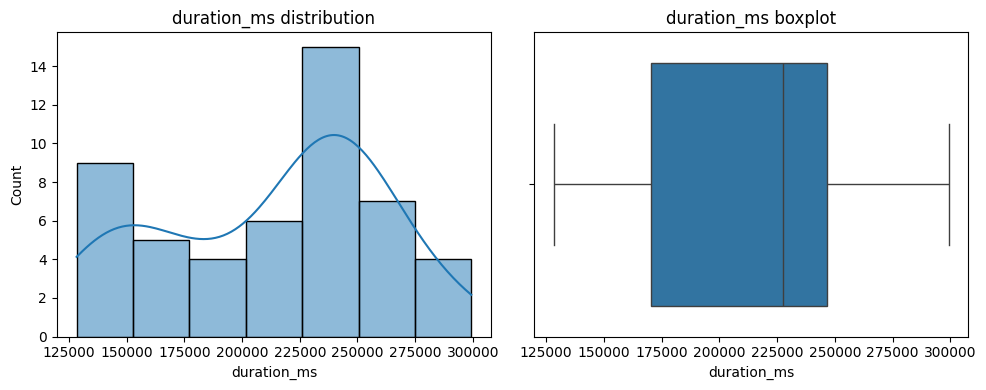

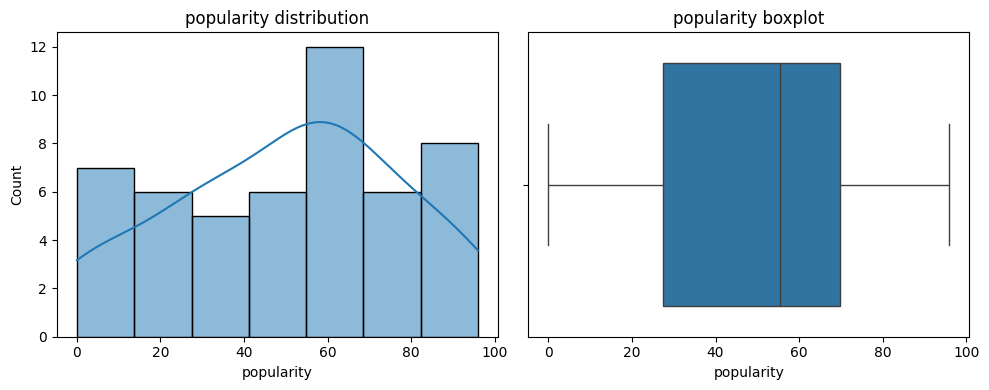

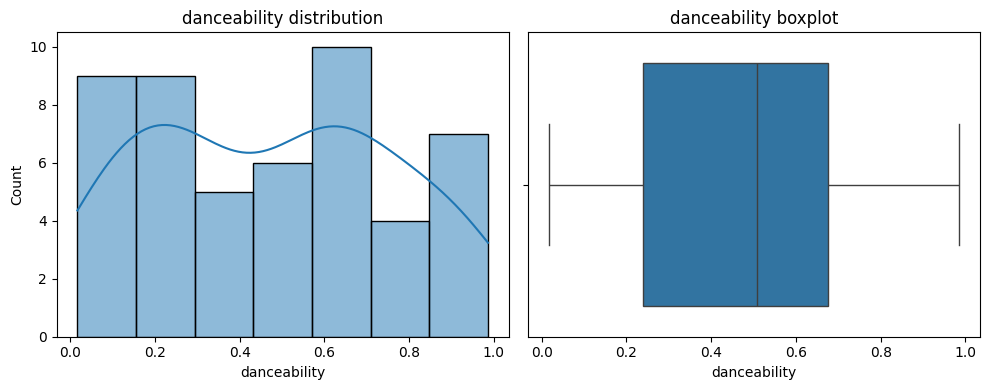

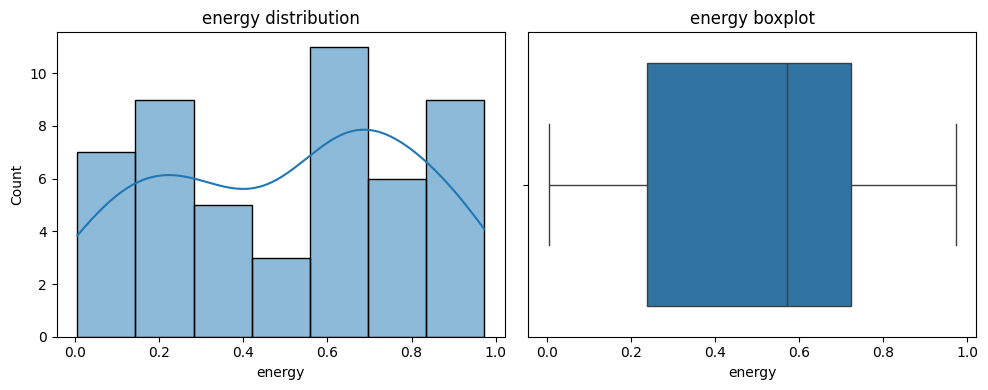

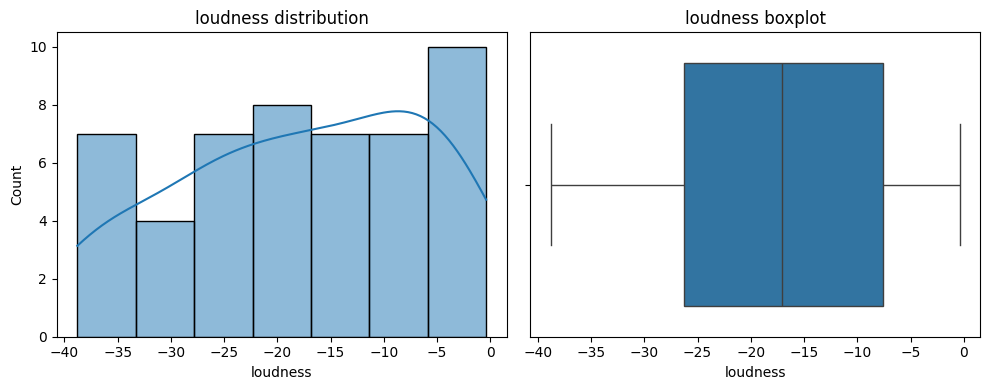

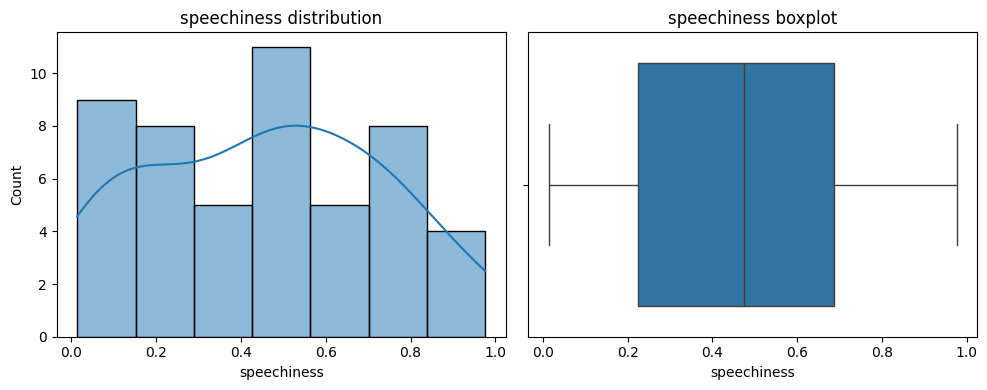

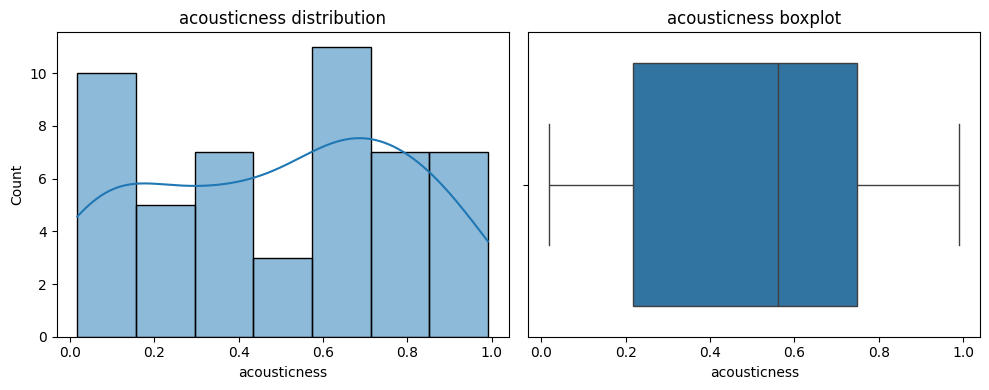

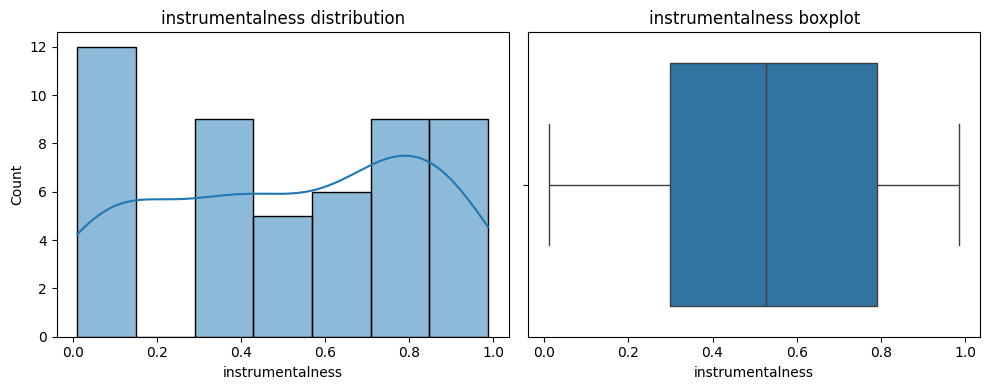

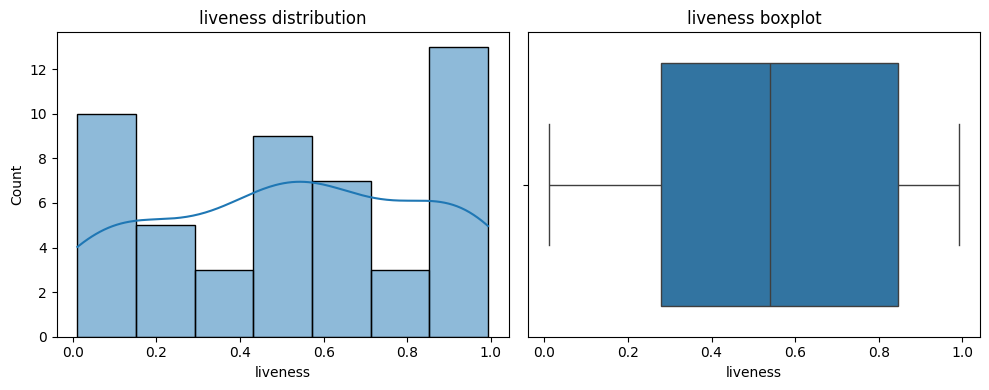

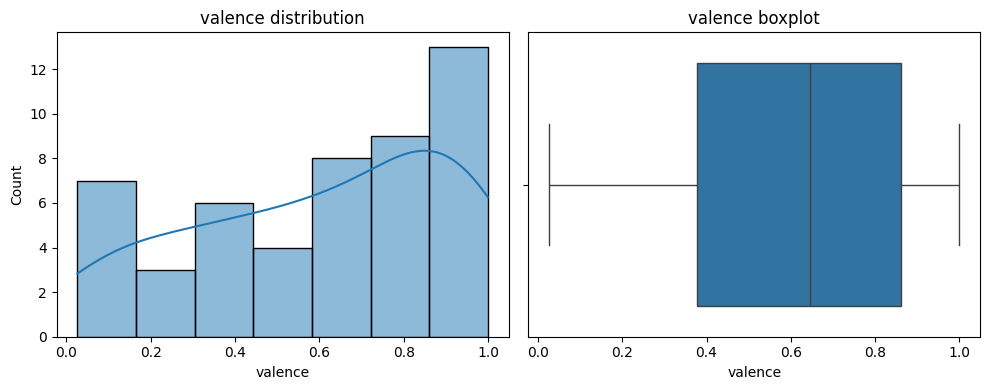

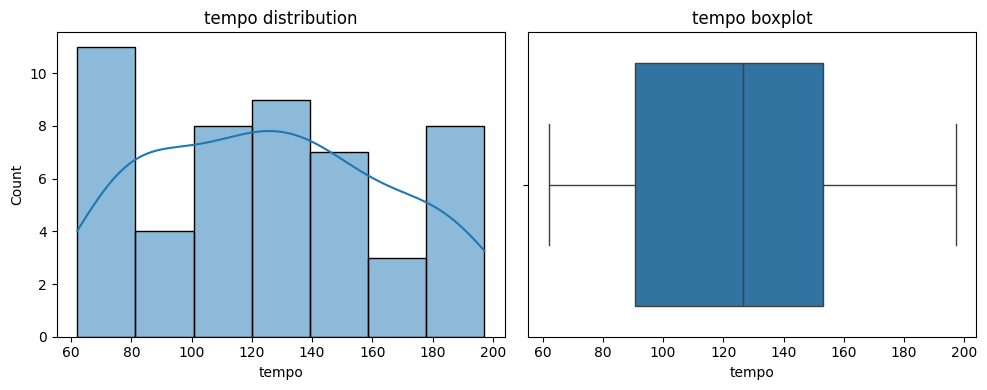

In [30]:
for col in numeric_cols:
    fig, ax = plt.subplots(1,2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f"{col} distribution")

    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f"{col} boxplot")
    plt.tight_layout()
    plt.show()

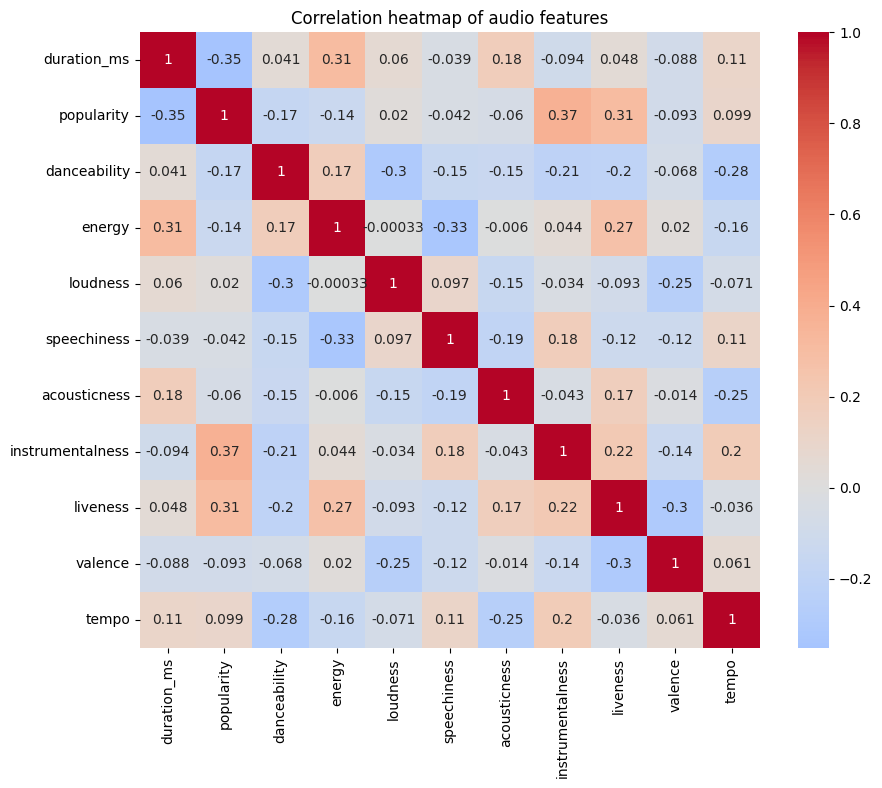

In [34]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation heatmap of audio features")
plt.show()

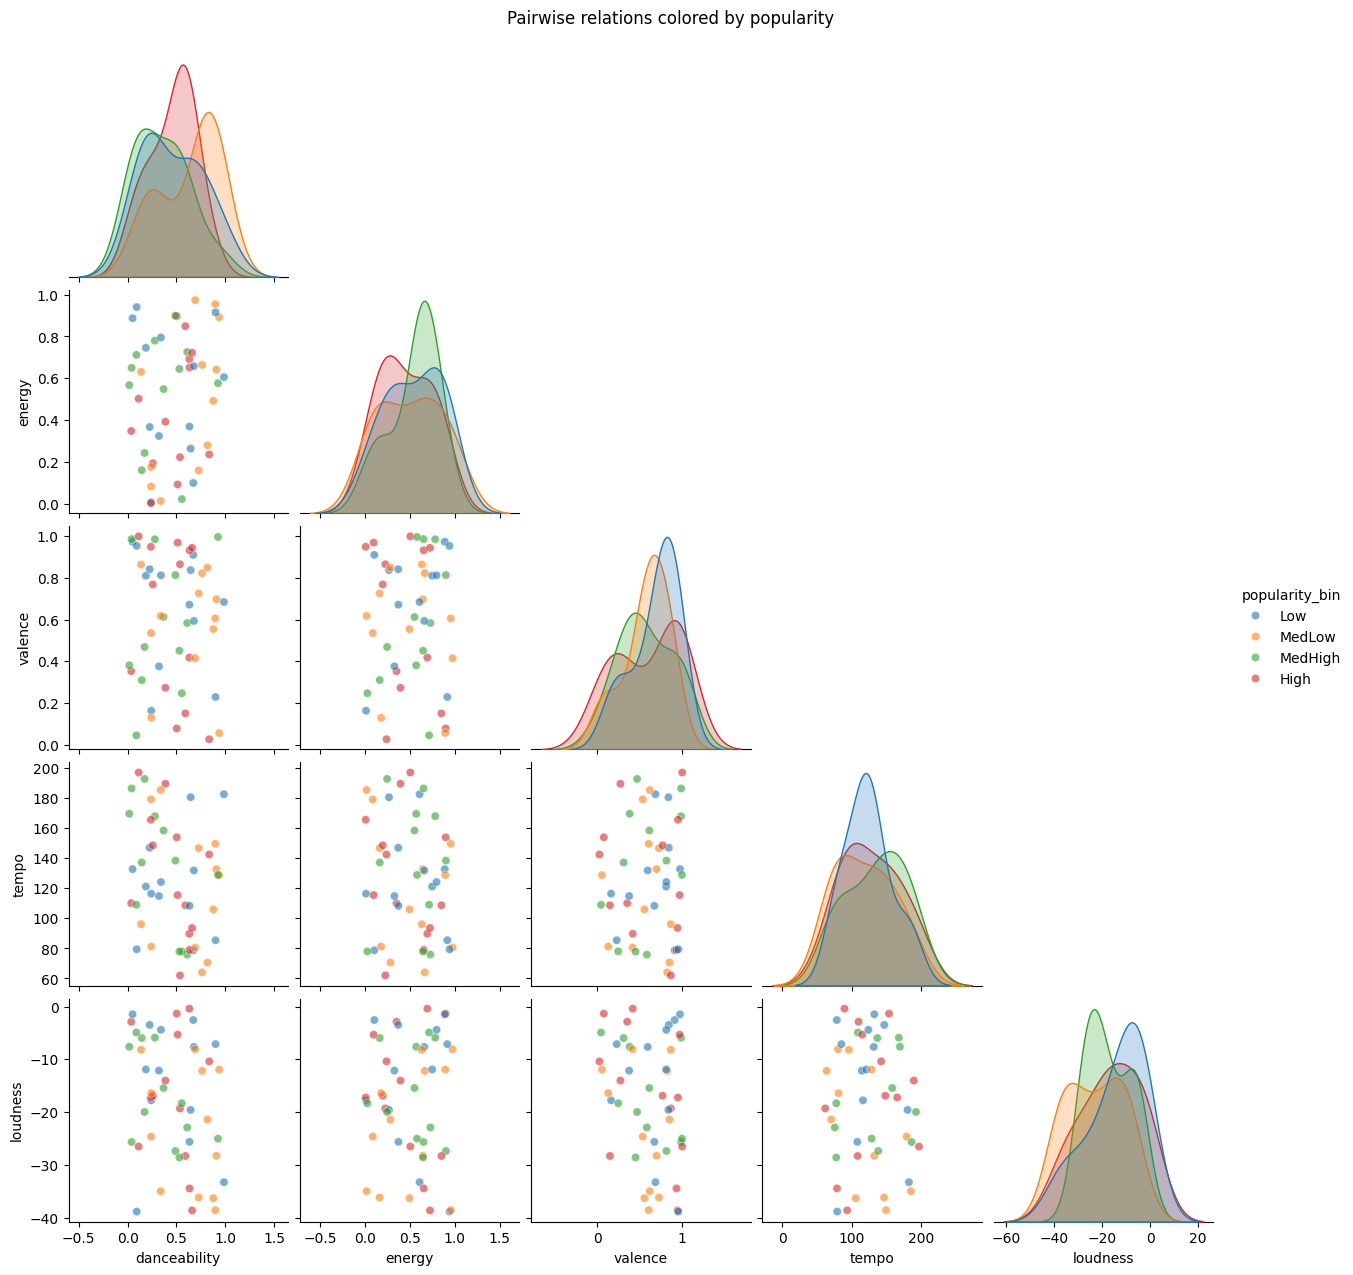

In [35]:
df["popularity_bin"] = pd.qcut(df["popularity"], q=4, labels=["Low", "MedLow", "MedHigh", "High"])

sns.pairplot(
    df,
    vars=["danceability", "energy", "valence", "tempo", "loudness"],
    hue="popularity_bin",
    corner=True,
    diag_kind="kde",
    plot_kws={"alpha": 0.6}
)
plt.suptitle("Pairwise relations colored by popularity", y=1.02)
plt.show()


In [36]:
df["duration_min"] = df["duration_ms"] / 60000

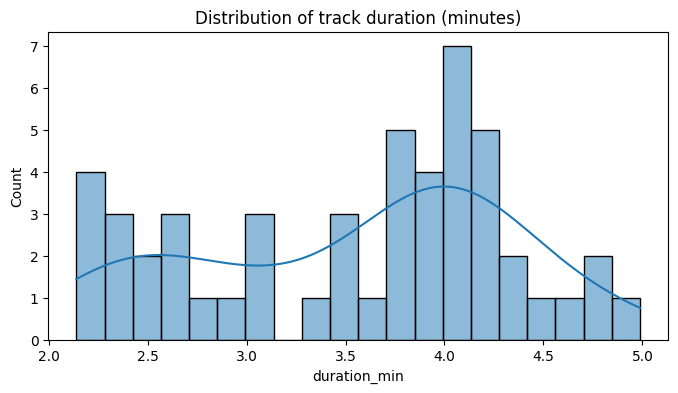

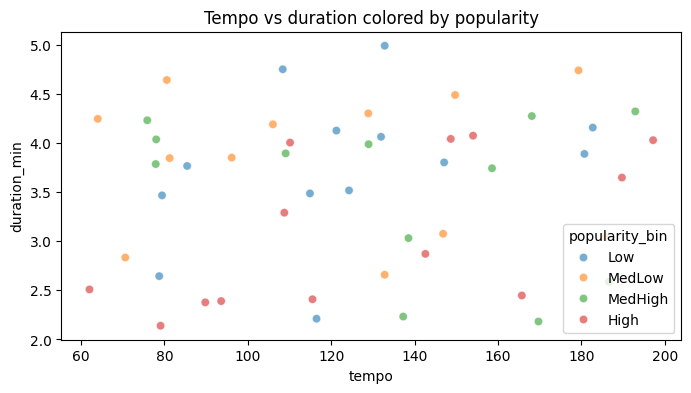

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(df["duration_min"], bins=20, kde=True)
plt.title("Distribution of track duration (minutes)")
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="tempo", y="duration_min", hue="popularity_bin", alpha=0.6)
plt.title("Tempo vs duration colored by popularity")
plt.show()

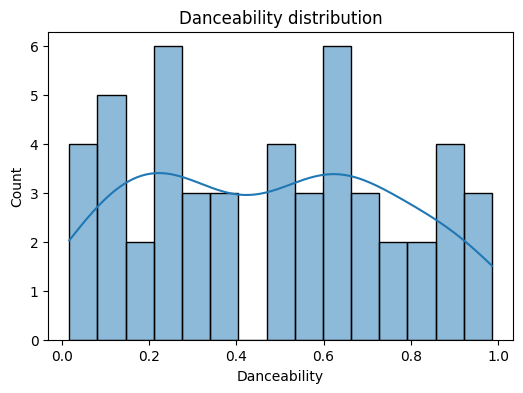

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(df["danceability"], bins=15, kde=True)
plt.title("Danceability distribution")
plt.xlabel("Danceability")
plt.ylabel("Count")
plt.show()

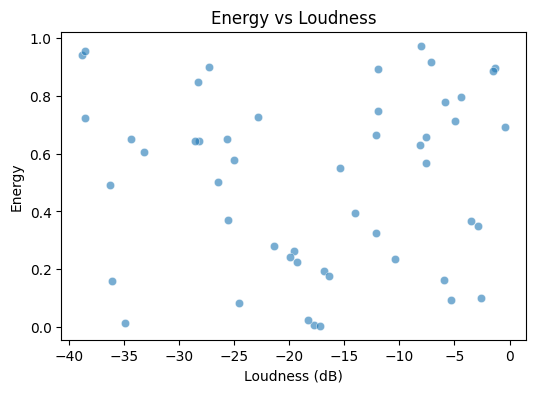

In [39]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="loudness", y="energy", alpha=0.6)
plt.title("Energy vs Loudness")
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy")
plt.show()